# Laboratorio de regresión logística

Diego Yael Islas Santoyo

742477

01/10/2024


La regresión logística es una herramienta utilizada para predecir respuestas cualitativas. Al igual que la regresión lineal, es un método sencillo que sirve como un punto de partida para técnicas más avanzadas. Por ejemplo, lo que se conoce como *redes neuronales* o *red de perceptrones multicapa* no es más que una estructura de regresiones logísticas que se alimentan entre sí.

1. Descarga el archivo de créditos y carga los datos (Default.csv). Utiliza `pandas`.

In [6]:
import pandas as pd
obj = pd.read_csv("Default.csv")


2. Utiliza el comando `obj.head()`, donde `obj` es el nombre que le diste a los datos del archivo.

In [9]:
obj.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


El comando head arroja los primeras *n* líneas (por defecto 5) de los datos que están en el DataFrame.

3. Utiliza el comando `obj.describe()`.

In [11]:
obj.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729275
max,2654.322576,73554.233500


El comando describe toma las columnas que tienen datos numéricos y saca datos estadísticos comunes:
- *n*
- media
- desviación estándar
- valor mínimo
- primer cuartil
- mediana
- tercer cuartil
- valor máximo

3. Vistos estos datos, ¿qué columnas existen en el DataFrame? ¿Qué tipo de datos contienen?

El DataFrame tiene las siguientes columnas:

**balance:** Contiene datos numéricos que representan saldos. Las estadísticas muestran un rango desde 0 hasta aproximadamente 2654.32 con una media de 835.37.

**income:** Contiene datos numéricos que representan ingresos, con un rango desde aproximadamente 771.97 hasta 73554.23 y una media de 33516.98.

Además, hay dos columnas adicionales con datos no numéricos (categóricos):

**default:** Contiene valores categóricos ("Yes" o "No") indicando si un cliente tiene un historial de impago.

**student:** Contiene valores categóricos ("Yes" o "No") indicando si el cliente es estudiante. ​

4. Configura el tipo de dato de las columnas `default` y `student` para cambiarlos a variables categóricas.

`data[columna] = data[columna].astype("category")`

In [26]:
import pandas as pd
obj = pd.read_csv("Default.csv")
obj['default'] = obj['default'].astype('category')
obj['student'] = obj['student'].astype('category')

print(obj.dtypes)

default    category
student    category
balance     float64
income      float64
dtype: object


Imagina que trabajas en un banco y que se te entregan estos datos. Tu objetivo es crear un modelo que ayude a predecir si una persona que solicita un crédito lo va a pagar. Exploremos los datos un poco más antes de crear un modelo.

Veamos primero cómo es la distribución de los valores cuando una persona dejó de pagar y cuando siguió pagando. `Default` es el término utilizado para cuando una persona dejó de pagar.

5. Crea una gráfica de caja para las columnas `income` y `balance`, con los datos agrupados con la columna `default`. Utiliza el comando `obj.boxplot(column=____, by=_____)`

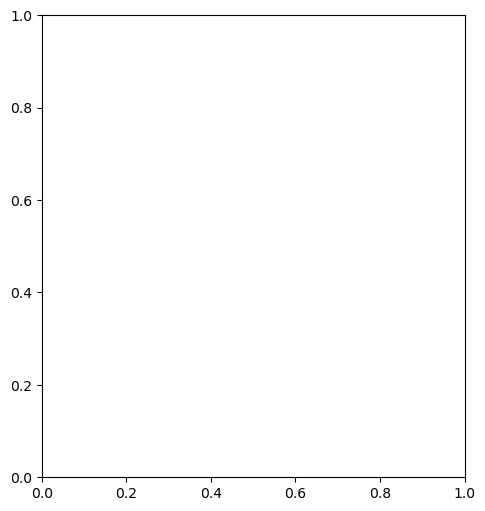

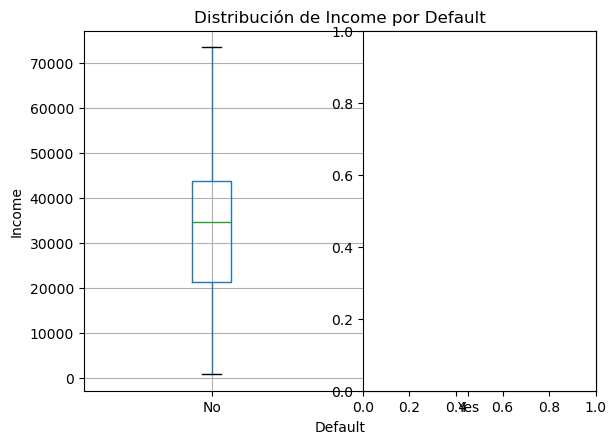

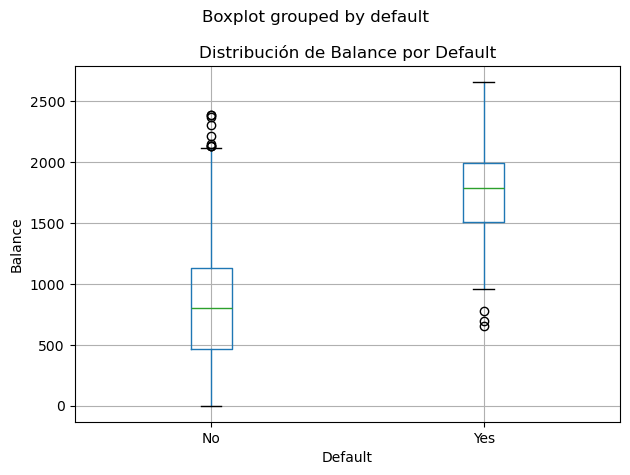

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


obj = pd.read_csv("Default.csv")  
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
obj.boxplot(column='income', by='default')
plt.title('Distribución de Income por Default')
plt.suptitle('')  
plt.xlabel('Default')
plt.ylabel('Income')

plt.subplot(1, 2, 2)
obj.boxplot(column='balance', by='default')
plt.title('Distribución de Balance por Default')
plt.xlabel('Default')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()


6. Crea una gráfica de dispersión donde el eje *x* sea la columna `balance` y el eje *y* la columna `income`. Utiliza el comando `obj.plot.scatter(x, y, c="default", colormap="PiYG_r", alpha=0.5)`.

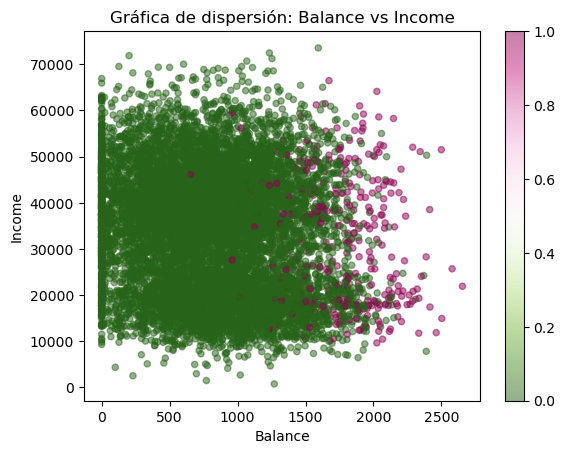

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

obj = pd.read_csv("Default.csv") 

obj['default'] = obj['default'].astype('category')
obj['student'] = obj['student'].astype('category')

obj.plot.scatter(x='balance', y='income', c=obj['default'].cat.codes, colormap="PiYG_r", alpha=0.5)

plt.title('Gráfica de dispersión: Balance vs Income')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.show()


La regresión (lineal o logística) se usa para encontrar una línea que ajuste los datos para tomar una decisión. La línea que buscamos en regresión logística es aquella que nos ayude a separar las diferentes categorías. 

<img style="float: left; " src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/decision_boundary_curve.jpg" width="400px" />


## Regresión logística simple

Creemos un modelo simple donde sólo utilizamos una de los factores para predecir una respuesta. Quiero conocer la probabilidad de que una persona deje de pagar su crédito dado el balance que tiene en su cuenta.

$$ P(\text{default}=\text{Yes}|\text{balance}) $$

Por el momento la columna default no contiene valores numéricos, por lo que hay que transformar los datos. Como default es nuestra variable de respuesta (lo que queremos predecir) podemos nombrarla *y*.

Ejecuta el código `y = obj["default"] == "Yes"`. Extrae el factor `balance` en una variable *x*.

In [48]:
import pandas as pd

obj = pd.read_csv("Default.csv")  

obj['default'] = obj['default'].astype('category')

y = obj["default"] == "Yes"

x = obj["balance"]

print(x.head())
print(y.head())


0     729.526495
1     817.180407
2    1073.549164
3     529.250605
4     785.655883
Name: balance, dtype: float64
0    False
1    False
2    False
3    False
4    False
Name: default, dtype: bool


Crea un gráfico de dispersión donde el eje *x* sea `balance` y el eje *y* sea `default` transformado.

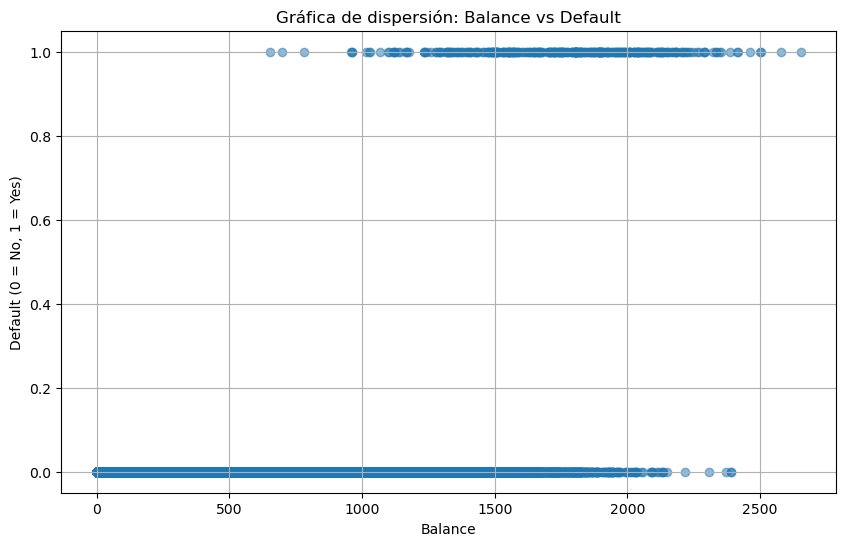

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

obj = pd.read_csv("Default.csv") 

obj['default'] = obj['default'].astype('category')

y_transformed = obj['default'].cat.codes  

plt.figure(figsize=(10, 6))
plt.scatter(obj['balance'], y_transformed, alpha=0.5)

plt.title('Gráfica de dispersión: Balance vs Default')
plt.xlabel('Balance')
plt.ylabel('Default (0 = No, 1 = Yes)')


plt.grid()
plt.show()


La línea que utilizaremos para predecir la probabilidad es:

$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$

Para nuestro ejemplo de pagos y balance:

$$ P(\text{default}=1|\text{balance}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance})}} $$

Buscamos maximizar la probabilidad de que el modelo tome decisiones correctas. Es decir, que cuando `default` fue verdadero, que la predicción sea 100%, y que cuando `default` fue falso que la predicción sea 0%.

$$ \Pi_{i:y_i=1} p(x_i) \Pi_{i':y_{i'}} (1-p(x_{i'})) $$

La función de costo ya simplificada es la siguiente:

$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

Utiliza la función `minimize` del módulo `optimize` la librería `scipy` para estimar los parámetros del modelo. Utiliza $\beta_0=-10$ y $\beta_1=0.005$ como valores iniciales.

In [63]:
import numpy as np
from scipy.optimize import minimize

def cost_function(beta, x, y):
    p_hat = 1 / (1 + np.exp(-(beta[0] + beta[1] * x)))
    
    epsilon = 1e-15
    p_hat = np.clip(p_hat, epsilon, 1 - epsilon)  
    
    cost = -np.sum(y * np.log(p_hat) + (1 - y) * np.log(1 - p_hat))
    return cost

initial_beta = np.array([-10, 0.005])

result = minimize(cost_function, initial_beta, args=(x, y))

estimated_betas = result.x
print("Estimated Betas:", estimated_betas)



Estimated Betas: [-1.06510143e+01  5.49871851e-03]


Muchos aspectos de la regresión logística son similares a la regresión lineal. Podemos medir la precisión de nuestros estimados calculando sus errores estándar. El objetivo de calcular estos errores es asegurar que hay una relación estadísticamente significativa entre el factor y la variable de respuesta.

Los errores estándar se obtienen con el siguiente procedimiento:

1. Calcula las predicciones utilizando los $\beta_0$ y $\beta_1$ encontrados.

In [68]:
import numpy as np

beta_0, beta_1 = estimated_betas

predictions = 1 / (1 + np.exp(-(beta_0 + beta_1 * x)))

print(predictions[:10])  


0    0.001306
1    0.002113
2    0.008596
3    0.000435
4    0.001777
5    0.003705
6    0.002212
7    0.002016
8    0.013834
9    0.000024
Name: balance, dtype: float64


2. Idealmente la probabilidad debería ser 100% o 0%. Si alguna predicción no fue absoluta significa que hay incertidumbre. Calcula $p(1-p)$ para todas tus predicciones.

In [72]:

uncertainty = predictions * (1 - predictions)

print(uncertainty[:10])  


0    0.001304
1    0.002108
2    0.008522
3    0.000434
4    0.001774
5    0.003691
6    0.002207
7    0.002012
8    0.013643
9    0.000024
Name: balance, dtype: float64


3. Crea una matriz vacía y llena la diagonal con las probabilidades encontradas.

`V = np.diagflat(*p(1-p)*)`

In [79]:
import numpy as np

V = np.diagflat(uncertainty)

print("Forma de la matriz V:", V.shape)
print("Primeras filas de V:\n", V[:5, :5]) 


Forma de la matriz V: (10000, 10000)
Primeras filas de V:
 [[0.0013042  0.         0.         0.         0.        ]
 [0.         0.00210846 0.         0.         0.        ]
 [0.         0.         0.00852174 0.         0.        ]
 [0.         0.         0.         0.00043434 0.        ]
 [0.         0.         0.         0.         0.00177408]]


4. Calcula la matriz de covarianza. (Dado que X es la matriz que contiene todos los factores)

`cov = np.linalg.inv(X.T @ V @ X)`

In [84]:
X = np.column_stack((np.ones(len(x)), x))  

cov = np.linalg.inv(X.T @ V @ X)

print("Matriz de covarianza:\n", cov)


Matriz de covarianza:
 [[ 1.30431818e-01 -7.81693910e-05]
 [-7.81693910e-05  4.85619687e-08]]


5. Los valores en la diagonal de la matriz de covarianza corresponden a la varianza de los factores. Utiliza los valores de la diagonal para calcular el error estándar.

`se = np.sqrt(np.diag(cov))`

In [87]:
se = np.sqrt(np.diag(cov))

print("Errores estándar:", se)


Errores estándar: [3.61153454e-01 2.20367803e-04]


Ahora, revisemos si los estimados de nuestros coeficientes demuestran que hay una relación significativa entre los factores y la respuesta.

Calculamos el estadístico *z*

$$ z_j = \frac{\hat{\beta_j}}{\text{SE}(\hat{\beta_j})} $$

In [90]:
z_statistics = estimated_betas / se

print("Estadísticos z:", z_statistics)


Estadísticos z: [-29.49165828  24.95245871]


Utilizamos el estadístico *z* para encontrar el *p-value*.

`from scipy.stats import norm`

`p_value = 2 * (1 - norm.cdf(abs(z_statistic)))`

In [92]:
from scipy.stats import norm

p_values = 2 * (1 - norm.cdf(abs(z_statistics)))

print("Valores p:", p_values)


Valores p: [0. 0.]


¿Es significativa la relación de los factores con la variable de respuesta?

[i]:.4f})")


Establecer un nivel de significancia: Comúnmente se utiliza un nivel de significancia de 𝛼 = 0.05 (5%). Esto significa que si el valor 𝑝 es menor que 0.05, puedes rechazar la hipótesis nula de que no hay relación entre el factor y la variable de respuesta.

**Interpretar los valores 𝑝:**

+ Si $$𝑝 \leq 0.05$$: La relación es estadísticamente significativa. Esto indica que hay evidencia suficiente para sugerir que el factor tiene un efecto en la variable de respuesta.
  
+ Si $$ 𝑝 \geq 0.05$$ : La relación no es estadísticamente significativa. Esto sugiere que no hay evidencia suficiente para afirmar que el factor influye en la variable de respuesta.

Repite el procedimiento con el factor `student`. 
1. Transforma el factor de {"Yes", "No"} a {1, 0}.
2. Utiliza `minimize` para estimar los coeficientes. Utiliza $\beta_0 = -3.5$ y $\beta_1 = 0.4$ como punto de partida.
3. Calcula el error estándar de tus estimaciones.
   1. Usa tu modelo para encontrar $\hat{p}(X)$
   2. Calcula el error $p(1-p)$
   3. Calcula la matriz de covarianza
   4. Extrae el error estándar
5. Argumenta si los factores son significativos utilizando el *p-value*.
   1. Utiliza el error estándar para calcular el estadístico *z*
   2. Calcula el *p-value*
   3. ¿Son significativos?


In [106]:

obj['student'] = obj['student'].map({"Yes": 1, "No": 0})
from scipy.optimize import minimize

def cost_function(beta, X, y):
    p = 1 / (1 + np.exp(-(beta[0] + beta[1] * X)))
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

X_student = obj['student'].values

initial_guess = np.array([-3.5, 0.4])
result = minimize(cost_function, initial_guess, args=(X_student, y))

beta_student = result.x
print("Coeficientes estimados para 'student':", beta_student)

p_student = 1 / (1 + np.exp(-(beta_student[0] + beta_student[1] * X_student)))
uncertainty_student = p_student * (1 - p_student)

X_student_design = np.column_stack((np.ones(len(X_student)), X_student))

V_student = np.diagflat(uncertainty_student)
cov_student = np.linalg.inv(X_student_design.T @ V_student @ X_student_design)

se_student = np.sqrt(np.diag(cov_student))

print("Errores estándar para 'student':", se_student)

z_student = beta_student / se_student

print("Estadísticos z para 'student':", z_student)

p_values_student = 2 * (1 - norm.cdf(abs(z_student)))

print("Valores p para 'student':", p_values_student)

alpha = 0.05

significance_student = p_values_student < alpha

for i, is_significant in enumerate(significance_student):
    if is_significant:
        print(f"El factor 'student' es significativo (p-value: {p_values_student[i]:.4f})")
    else:
        print(f"El factor 'student' NO es significativo (p-value: {p_values_student[i]:.4f})")




Coeficientes estimados para 'student': [-3.50412777  0.40488708]
Errores estándar para 'student': [0.07071318 0.11501895]
Estadísticos z para 'student': [-49.55409416   3.52017733]
Valores p para 'student': [0.         0.00043126]
El factor 'student' es significativo (p-value: 0.0000)
El factor 'student' es significativo (p-value: 0.0004)


## Regresión logística múltiple

Considera ahora el caso de múltiples factores. Intentemos predecir si la persona dejará de pagar su crédito utilizando toda la información que tenemos disponible. I.e.

$$ P(\text{default}=1|\text{balance}, \text{income}, \text{student}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance} + \beta_2 \text{income} + \beta_3 \text{student})}} $$

1. Utiliza `minimize` para estimar los coeficientes. Utiliza los siguientes valores como punto de partida:
   - $\beta_0 = -10$
   - $\beta_1 = 0.005$
   - $\beta_2 = 0.003$
   - $\beta_3 = -0.65$
2. Calcula el error estándar de tus estimaciones.
3. Argumenta si los factores son significativos utilizando el *p-value*. 

In [114]:
def cost_function_multi(beta, X, y):
    p = 1 / (1 + np.exp(-(beta[0] + beta[1] * X[:, 0] + beta[2] * X[:, 1] + beta[3] * X[:, 2])))
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

X_multi = obj[['balance', 'income', 'student']].values

initial_guess_multi = np.array([-10, 0.005, 0.003, -0.65])
result_multi = minimize(cost_function_multi, initial_guess_multi, args=(X_multi, y))

beta_multi = result_multi.x
print("Coeficientes estimados:", beta_multi)

p_multi = 1 / (1 + np.exp(-(beta_multi[0] + beta_multi[1] * X_multi[:, 0] +
                             beta_multi[2] * X_multi[:, 1] + beta_multi[3] * X_multi[:, 2])))

uncertainty_multi = p_multi * (1 - p_multi)

X_multi_design = np.column_stack((np.ones(len(X_multi)), X_multi))

V_multi = np.diagflat(uncertainty_multi)
cov_multi = np.linalg.inv(X_multi_design.T @ V_multi @ X_multi_design)
se_multi = np.sqrt(np.diag(cov_multi))

print("Errores estándar:", se_multi)

z_multi = beta_multi / se_multi

print("Estadísticos z:", z_multi)

p_values_multi = 2 * (1 - norm.cdf(abs(z_multi)))

print("Valores p:", p_values_multi)

alpha = 0.05

significance_multi = p_values_multi < alpha

for i, is_significant in enumerate(significance_multi):
    if is_significant:
        print(f"El factor {i} es significativo (p-value: {p_values_multi[i]:.4f})")
    else:
        print(f"El factor {i} NO es significativo (p-value: {p_values_multi[i]:.4f})")




C:\Users\Hp\AppData\Local\Temp\ipykernel_3256\2042317044.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\Hp\AppData\Local\Temp\ipykernel_3256\2042317044.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\Hp\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Hp\AppData\Local\Temp\ipykernel_3256\2042317044.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\Hp\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Hp\AppData\Local\Temp\ipykernel_3256\2042317044.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\Hp\anaconda3\Lib\

Coeficientes estimados: [-1.0e+01  5.0e-03  3.0e-03 -6.5e-01]
Errores estándar: [4.11883221e+03 4.90454363e-03 1.82471771e-03 4.11881049e+03]
Estadísticos z: [-2.42787263e-03  1.01946284e+00  1.64408992e+00 -1.57812553e-04]
Valores p: [0.99806284 0.30798328 0.10015763 0.99987408]
El factor 0 NO es significativo (p-value: 0.9981)
El factor 1 NO es significativo (p-value: 0.3080)
El factor 2 NO es significativo (p-value: 0.1002)
El factor 3 NO es significativo (p-value: 0.9999)


¿Cómo sabemos qué tan bueno es el modelo? Hay cuatro posibles casos para un problema de clasificación simple:
- Era sí y se predijo sí. (Verdadero positivo **TP**)
- Era sí y se predijo no. (Falso negativo **FN**)
- Era no y se predijo sí. (Falso positivo **FP**)
- Era no y se predijo no. (Verdadero negativo **TN**)

De esos cuatro casos hay dos donde el modelo es correcto y dos donde el modelo no es correcto.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IuymDnZpRlkat0qejE26Nw.png)

1. Menciona dos ejemplos donde consideres que un falso positivo sea un peor resultado que un falso negativo.

**Pruebas de cáncer:** En un examen de detección de cáncer, un falso positivo puede llevar a que un paciente sea diagnosticado erróneamente con cáncer cuando en realidad no lo tiene. Esto puede resultar en tratamientos invasivos y costosos, así como en ansiedad y estrés emocional significativo para el paciente y su familia. En este caso, un falso negativo (no detectar un cáncer que sí está presente) también es grave, pero el daño emocional y físico que puede causar un falso positivo suele ser más inmediato y severo.

**Pruebas de COVID-19:** Durante la pandemia, un falso positivo en una prueba de COVID-19 puede llevar a que una persona sea puesta en cuarentena innecesariamente, afectando su trabajo, vida social y bienestar mental. Además, puede contribuir a la propagación de la desconfianza en las pruebas y el sistema de salud. Por otro lado, un falso negativo puede significar que una persona portadora del virus no sea identificada, lo que puede resultar en la propagación del virus; sin embargo, el impacto directo e inmediato de un falso positivo en la vida cotidiana de una persona puede ser más disruptivo.

2. Menciona dos ejemplos donde consideres que un falso negativo sea un peor resultado que un falso positivo.

**Pruebas de VIH:** En una prueba de detección de VIH, un falso negativo puede resultar en que una persona que realmente está infectada no reciba el tratamiento necesario. Esto no solo pone en riesgo la salud del individuo al no tratar la infección, sino que también aumenta el riesgo de transmisión del virus a otras personas. Un falso positivo en este contexto podría causar ansiedad y pruebas adicionales, pero el daño causado por un falso negativo puede tener consecuencias mucho más graves para la salud pública y personal.

**Detección de incendios:** En sistemas de alarma de incendios, un falso negativo (no detectar un incendio que realmente está ocurriendo) puede tener consecuencias devastadoras, como la pérdida de vidas o daños significativos a la propiedad. Si un detector de humo falla al alertar sobre un incendio, las personas pueden no evacuarse a tiempo, lo que puede resultar en lesiones graves o fatales. En contraste, un falso positivo (alarma falsa) puede ser molesto y causar interrupciones, pero generalmente no tiene consecuencias tan graves como un falso negativo en este contexto.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3